# Overskrift

<ul>
<li>Rense data
<li>Display data
<li>Kanskje finne noen pakker som støtter adx og de der?
<li>Sette indikatorverktøy i egne py filer


In [2]:
import warnings
import pandas as pd
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

import matplotlib.pyplot as plt
import plotly.express as px
import stockstats
import sys
import os

from lib.rens import rens
from lib.god_runde import positiv_utvikling



In [10]:
def hent_indikatortall(data, gode):
    stock = stockstats.StockDataFrame.retype(data)
    indikatorer = ['rsi_20', 'trix', 'adx', 'kdjk', 'pdi', 'tr']
    for ind in indikatorer:
        stock[ind]

    all_indikator = {ind:[] for ind in indikatorer}

    for ix, fin in gode.iterrows():
        oppgang = stock[int(fin.start):int(fin.endex)]     
        for ind in all_indikator:
            all_indikator[ind].append(oppgang[ind].values)
    
    return all_indikator

def multi_analyse(filer):
    alle_gode = pd.DataFrame(columns=['navn'])

    for i, fil in enumerate(filer):
        print(f"{i+1} av {len(filer)} analysert" ,end='\r')
        data = cleanup.clean_data(pd.read_excel(fil))
        gode = pos_ut.calculate(data)
        alle_ind = hent_indikatortall(data, gode)
        for ind in alle_ind:
            gode[ind] = alle_ind[ind]
            
        gode['navn'] = fil.split('/')[1].split('.xl')[0]
        alle_gode = alle_gode.append(gode, ignore_index=True)
               
    return alle_gode


def add_data(word):
    ordet = 'data/' + word
    return ordet

In [3]:
cleanup = rens()
pos_ut = positiv_utvikling()

In [11]:
filer = list(map(add_data, os.listdir('data/')))[:10]
data = multi_analyse(filer)
data

,navn,start,endex,start_pris,slutt_pris,oppgang,score,rsi_20,trix,adx,kdjk,pdi,tr
0,Aker 02.04.2020,128.0,186.0,240.20,247.80,3.164030,50.703007,"[33.81243254968905, 33.81243254968905, 38.6569...","[-0.04397465516493707, -0.045443866319610726, ...","[36.08706762740083, 41.425606959525396, 35.190...","[10.330356638278655, 6.886904425519103, 21.257...","[20.575997705659802, 19.204368651592503, 36.65...","[0.8000000000000114, 0.0, 0.6000000000000227, ..."
1,Aker 02.04.2020,229.0,267.0,245.80,249.60,1.545972,31.951273,"[50.71615637249463, 47.90096406491234, 47.9009...","[-0.010354636272359287, -0.009138505674278392,...","[13.275186983686837, 9.972765689914738, 7.6138...","[56.62048569675035, 57.74699046450004, 58.4979...","[57.48483533949356, 49.427191212857586, 46.132...","[0.20000000000001705, 0.4000000000000057, 0.0,..."
2,Aker 30.04.2020,58.0,106.0,267.80,272.60,1.792382,36.304068,"[39.67111865884208, 39.17672236892631, 38.6694...","[-0.10058224660774777, -0.0966240136151853, -0...","[24.32762762603465, 20.41292084142183, 18.6604...","[31.86117198134676, 40.28840036851708, 52.7848...","[43.66175439089103, 40.057335328070224, 36.710...","[0.4000000000000341, 0.19999999999998863, 0.20..."
3,Aker 30.04.2020,118.0,159.0,270.40,273.60,1.183432,30.083060,"[48.123898874117444, 49.52600847498533, 53.495...","[-0.004073298420161102, -0.006143478019842823,...","[22.037179285513112, 16.26703352425007, 18.733...","[25.604326110013336, 50.40288407334222, 66.935...","[33.97455971123664, 38.38956580487726, 54.2689...","[0.19999999999998863, 0.20000000000004547, 0.5..."
4,Aker 31.03.2020,41.0,70.0,227.80,235.00,3.160667,29.493962,"[47.55734379453681, 49.10491214742308, 47.6255...","[-0.04210342809995147, -0.04285742782661868, -...","[19.247116083016955, 14.728084077811229, 12.13...","[24.474026944328852, 39.39294103980881, 44.210...","[42.84249414954291, 45.84920932050769, 41.0927...","[0.6000000000000227, 0.39999999999997726, 0.39..."
5,Aker 31.03.2020,112.0,142.0,232.80,235.00,0.945017,24.096609,"[47.36172689163056, 43.825070640844395, 50.617...","[-0.04267460755521606, -0.04193714503093347, -...","[13.197240567331558, 15.514714992647638, 14.93...","[48.63586770570082, 37.18581656570511, 58.1238...","[47.30738681008206, 39.432001642142076, 61.936...","[0.4000000000000057, 0.8000000000000114, 1.400..."
6,Aker 31.03.2020,279.0,313.0,229.00,233.40,1.921397,27.159496,"[39.788251937614454, 42.89453467747394, 42.894...","[-0.0495834858690581, -0.047488407764097115, -...","[23.125768680972524, 17.437982935095057, 13.37...","[24.308843353623416, 49.5392289024156, 66.3594...","[41.14747675252741, 49.30771181339471, 46.0205...","[0.19999999999998863, 0.4000000000000057, 0.0,..."
7,Aker BP 20.08.2020,163.0,207.0,175.15,176.75,0.913503,28.551216,"[52.614410878664444, 50.49169578004401, 50.491...","[0.0038925265723230265, 0.0032561865549406246,...","[13.126163419906153, 10.870476651852533, 9.259...","[40.23633760065505, 40.15755840043594, 43.4383...","[55.831043474899765, 49.13275942086825, 45.857...","[0.05000000000001137, 0.05000000000001137, 0.0..."
8,Aker BP 27.04.2020,21.0,61.0,154.00,155.45,0.941558,27.912907,"[51.13648908828135, 46.53724332213418, 44.7711...","[-0.014545718565755279, -0.014296135121243381,...","[16.588974494887076, 13.550140206725327, 13.51...","[41.38479487079308, 38.700974358306496, 28.975...","[53.97142887710382, 45.37294618922496, 40.8328...","[0.9499999999999886, 0.5999999999999943, 0.25,..."
9,Aker BP 29.04.2020,36.0,78.0,159.45,164.15,2.947632,34.597741,"[43.71824202124468, 48.78749808747356, 49.6553...","[-0.026287386371428013, -0.027061119126633993,...","[19.641346289478964, 15.184100115001478, 13.15...","[26.353295187992607, 38.55651777964934, 49.161...","[36.82601371770867, 51.05682266172627, 50.7405...","[0.15000000000000568, 0.5500000000000114, 0.09..."


In [12]:
data_oppgang = data[data.oppgang > 1]
data_oppgang = data_oppgang[data_oppgang.score > 30]

data_oppgang

,navn,start,endex,start_pris,slutt_pris,oppgang,score,rsi_20,trix,adx,kdjk,pdi,tr
0,Aker 02.04.2020,128.0,186.0,240.20,247.80,3.164030,50.703007,"[33.81243254968905, 33.81243254968905, 38.6569...","[-0.04397465516493707, -0.045443866319610726, ...","[36.08706762740083, 41.425606959525396, 35.190...","[10.330356638278655, 6.886904425519103, 21.257...","[20.575997705659802, 19.204368651592503, 36.65...","[0.8000000000000114, 0.0, 0.6000000000000227, ..."
1,Aker 02.04.2020,229.0,267.0,245.80,249.60,1.545972,31.951273,"[50.71615637249463, 47.90096406491234, 47.9009...","[-0.010354636272359287, -0.009138505674278392,...","[13.275186983686837, 9.972765689914738, 7.6138...","[56.62048569675035, 57.74699046450004, 58.4979...","[57.48483533949356, 49.427191212857586, 46.132...","[0.20000000000001705, 0.4000000000000057, 0.0,..."
2,Aker 30.04.2020,58.0,106.0,267.80,272.60,1.792382,36.304068,"[39.67111865884208, 39.17672236892631, 38.6694...","[-0.10058224660774777, -0.0966240136151853, -0...","[24.32762762603465, 20.41292084142183, 18.6604...","[31.86117198134676, 40.28840036851708, 52.7848...","[43.66175439089103, 40.057335328070224, 36.710...","[0.4000000000000341, 0.19999999999998863, 0.20..."
3,Aker 30.04.2020,118.0,159.0,270.40,273.60,1.183432,30.083060,"[48.123898874117444, 49.52600847498533, 53.495...","[-0.004073298420161102, -0.006143478019842823,...","[22.037179285513112, 16.26703352425007, 18.733...","[25.604326110013336, 50.40288407334222, 66.935...","[33.97455971123664, 38.38956580487726, 54.2689...","[0.19999999999998863, 0.20000000000004547, 0.5..."
9,Aker BP 29.04.2020,36.0,78.0,159.45,164.15,2.947632,34.597741,"[43.71824202124468, 48.78749808747356, 49.6553...","[-0.026287386371428013, -0.027061119126633993,...","[19.641346289478964, 15.184100115001478, 13.15...","[26.353295187992607, 38.55651777964934, 49.161...","[36.82601371770867, 51.05682266172627, 50.7405...","[0.15000000000000568, 0.5500000000000114, 0.09..."
11,Aker BP 30.04.2020,62.0,111.0,166.30,170.00,2.224895,37.120464,"[39.28638402164819, 41.0404983404407, 40.79238...","[-0.06371392783607457, -0.06201924290997608, -...","[22.724398765991943, 17.23682159522736, 13.900...","[38.57074732638682, 55.343461180554726, 68.840...","[37.23347900163613, 41.29145844449103, 38.2071...","[0.14999999999997726, 0.25, 0.0500000000000113..."
14,Aker BP 31.03.2020,120.0,171.0,128.30,130.75,1.909587,35.553886,"[48.469794160419035, 49.26645625114961, 46.255...","[-0.02529909972235252, -0.024559551360116286, ...","[23.641461333578828, 18.780573371030304, 18.03...","[41.818932186780806, 61.212621457853864, 55.09...","[41.286010819928514, 42.23972649402004, 35.588...","[0.15000000000000568, 0.04999999999998295, 0.1..."
15,Bakkafrost 31.03.2020,40.0,96.0,493.60,516.00,4.538088,59.716758,"[52.0789409300997, 54.52131984254919, 53.56344...","[0.014790985828673366, 0.013810456341929078, 0...","[10.662192880934992, 10.112372301176952, 8.116...","[33.92157401165029, 43.447716007766566, 45.631...","[41.152464704634745, 48.417292331991106, 44.21...","[0.19999999999998863, 0.5999999999999659, 0.19..."


In [34]:
data_oppgang.shape


(35, 14)

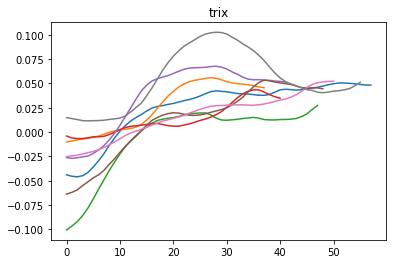

In [13]:
fig = plt.figure
plt.title('trix')
for i in data_oppgang.trix:
    plt.plot(i)
#plt.savefig('images/trixplot')

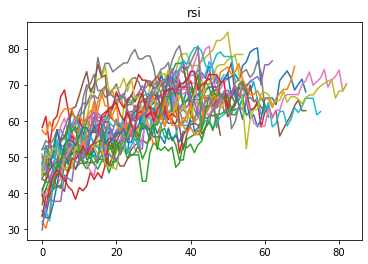

In [9]:
fig = plt.figure
plt.title('rsi')
for i in data_oppgang.rsi:
    plt.plot(i)
plt.savefig('images/rsiplot')

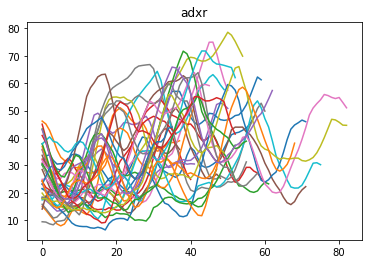

In [10]:
fig = plt.figure
plt.title('adxr')
for i in data_oppgang.adxr:
    plt.plot(i)
plt.savefig('images/adxrplot')

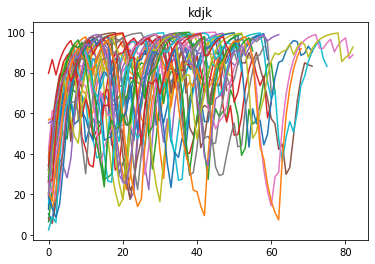

In [12]:
fig = plt.figure
plt.title('kdjk')
for i in data_oppgang.kdjk:
    plt.plot(i)
plt.savefig('images/kdjkplot')

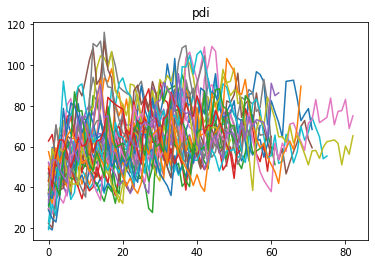

In [16]:
fig = plt.figure
plt.title('pdi')
for i in data_oppgang.pdi:
    plt.plot(i)
plt.savefig('images/pdiplot')

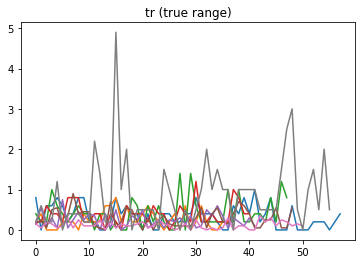

In [14]:
fig = plt.figure
plt.title('tr (true range)')
for i in data_oppgang.tr:
    plt.plot(i)
#plt.savefig('images/tplot')

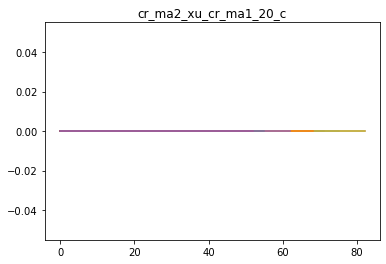

In [35]:
fig = plt.figure
plt.title('cr_ma2_xu_cr_ma1_20_c')
for i in data_oppgang.cr_ma2_xu_cr_ma1_20_c:
    plt.plot(i)
plt.savefig('images/tplot')